<a href="https://colab.research.google.com/github/Patan-Arif0608/ObjectDetection_using_YOLO/blob/main/Object_Detection_using_YOLO_algorithm_on_COCO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np

In [ ]:
#Load YOLO model files
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")

In [ ]:
#load coco object names
classes = []
with open("/content/coco.names", "r") as f:
    for line in f.readlines():
        classes.append(line.strip())
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


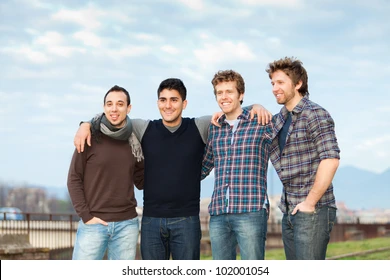

In [ ]:
#Loading the image
img = cv2.imread("/content/contentgroup-boys-outside-260nw-102001054.webp.png")
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
#Resize image to 419*416 as we are using YOLOV-416
img=cv2.resize(img,(416,416))
img.shape

(416, 416, 3)

In [ ]:
#collect height, width and no. of channels from image shape
height, width, channels = img.shape
print(height, width, channels)

416 416 3


In [ ]:
#convert image to BLOB (Binary large object)
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), True, crop=False)

In [ ]:
#set input for YOLO object detection
net.setInput(blob)

In [ ]:
#find names of all layers
layer_names = net.getLayerNames()
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

In [ ]:
#find names of output layers
output_layers = []
for i in net.getUnconnectedOutLayers():
    output_layers.append(layer_names[i - 1])
print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


In [ ]:
#send blob data to YOLO model and send results to output_layers
blobdata = net.forward(output_layers)

In [ ]:
#blobdata is a group of 2D arrays that conatin float numbers
blobdata

(array([[0.04582352, 0.03417606, 0.2968976 , ..., 0.        , 0.        ,
         0.        ],
        [0.05987418, 0.03721034, 0.23448515, ..., 0.        , 0.        ,
         0.        ],
        [0.05397274, 0.02390241, 1.0516249 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95492756, 0.95707923, 0.42644894, ..., 0.        , 0.        ,
         0.        ],
        [0.96069777, 0.9645354 , 0.3070159 , ..., 0.        , 0.        ,
         0.        ],
        [0.9649941 , 0.96371466, 0.83732945, ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02401312, 0.03056377, 0.0546088 , ..., 0.        , 0.        ,
         0.        ],
        [0.01791327, 0.02785595, 0.18035674, ..., 0.        , 0.        ,
         0.        ],
        [0.02594813, 0.02059417, 0.09113611, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.9724793 , 0.979124  , 0.04469977, ..., 0.        , 0.        ,
         0.        

In [ ]:
#Generating random color for all 80 classes
colors=np.random.uniform(0,255,size=(80,3))

In [ ]:
#detect the objects in the image
cls_ids = []
confidences = []
boxes = []


In [ ]:
for x in blobdata:
    for detection in x:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
          center_x = int(detection[0] * width)
          center_y = int(detection[1] * height)
          w = int(detection[2] * width)
          h = int(detection[3] * height)
          x=int(center_x - w/2)
          y = int(center_y - h/2)
          boxes.append([x, y, w, h])
          confidences.append(float(confidence))
          cls_ids.append(class_id)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

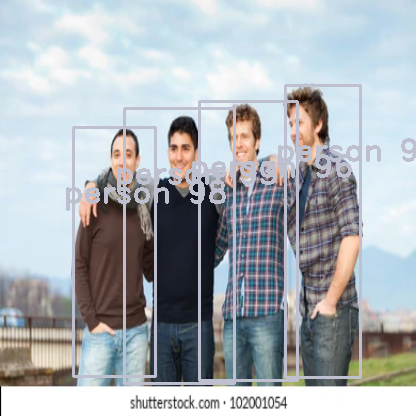

In [ ]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[cls_ids[i]])
        confidence = confidences[i] * 100
        color = colors[cls_ids[i]]
        cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        str1 = "%s %d" % (label, confidence)
        cv2.putText(img, str1, (x-10, y + 75), cv2.FONT_HERSHEY_DUPLEX, 1, color, 2)
cv2_imshow(img)